In [1]:
import plumed
from matplotlib import pyplot as plt
import numpy as np
import MDAnalysis as md
import itertools
#import pyemma
import pandas as pd
import string

import warnings
warnings.filterwarnings('ignore')

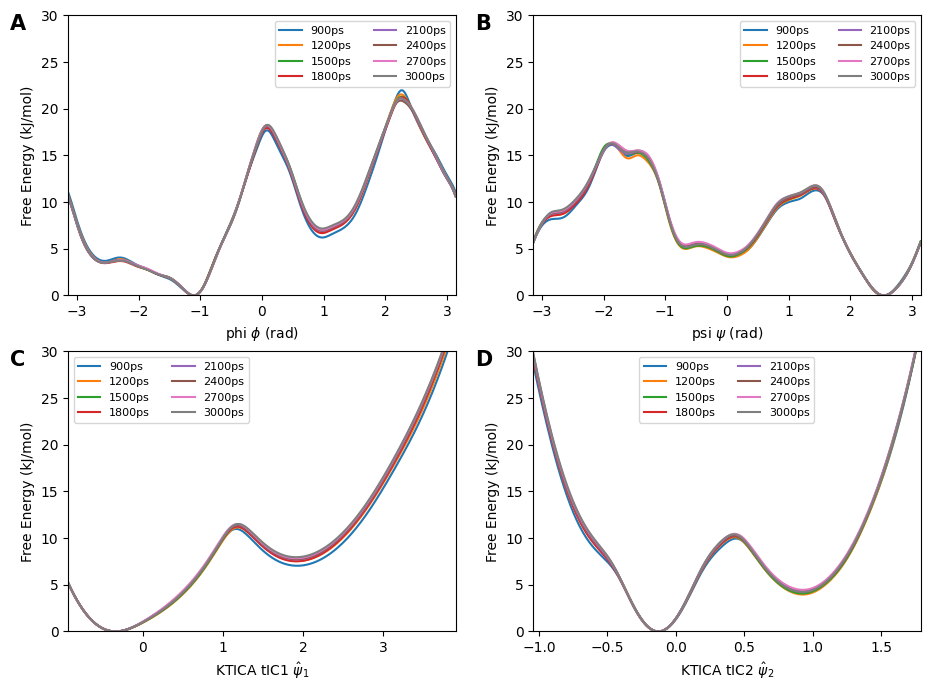

In [2]:
### 1D FES
# 1. FES vs time
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(11,8))
index_x = -0.15
index_y = 0.95

n_split = 10

fes_1d = {}
colvar_name = ['phi','psi','tica0','tica1']
label_name = ['phi','psi','KTICA IC1','KTICA IC2']
xlabel_name = ['phi $\phi$ (rad)','psi $\psi$ (rad)',r'KTICA tIC1 $\hat \psi_1$',r'KTICA tIC2 $\hat \psi_2$']

cv = 'phi'
fes_1d[cv] = [0] * n_split
for i in range(0,n_split):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes0/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > 1:
        ax[0,0].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ps'.format(time=(i+1)*300))
ax[0,0].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[0,0].set_ylim(0,30)
ax[0,0].set_xlabel(xlabel_name[0])
ax[0,0].set_ylabel('Free Energy (kJ/mol)')
ax[0,0].legend(ncols=2,fontsize=8)

cv = 'psi'
fes_1d[cv] = [0] * n_split
for i in range(0,n_split):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes0/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > 1:
        ax[0,1].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ps'.format(time=(i+1)*300))
ax[0,1].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[0,1].set_ylim(0,30)
ax[0,1].set_xlabel(xlabel_name[1])
ax[0,1].set_ylabel('Free Energy (kJ/mol)')
ax[0,1].legend(ncols=2,fontsize=8)

cv = 'tica0'
fes_1d[cv] = [0] * n_split
for i in range(0,n_split):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes0/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > 1:
        ax[1,0].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ps'.format(time=(i+1)*300))
ax[1,0].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[1,0].set_ylim(0,30)
ax[1,0].set_xlabel(xlabel_name[2])
ax[1,0].set_ylabel('Free Energy (kJ/mol)')
ax[1,0].legend(ncols=2,fontsize=8)

cv = 'tica1'
fes_1d[cv] = [0] * n_split
for i in range(0,n_split):
    fes_1d[cv][i] = plumed.read_as_pandas('hist-fes0/fes-{cv}_{i}.dat'.format(cv=cv,i=i+1))
    if i > 1:
        ax[1,1].plot(fes_1d[cv][i][cv],fes_1d[cv][i]['file.free'],ms=3,label='{time}ps'.format(time=(i+1)*300))
ax[1,1].set_xlim(fes_1d[cv][i][cv].min(),fes_1d[cv][i][cv].max())
ax[1,1].set_ylim(0,30)
ax[1,1].set_xlabel(xlabel_name[3])
ax[1,1].set_ylabel('Free Energy (kJ/mol)')
ax[1,1].legend(ncols=2,fontsize=8)

ax[0,0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0,0].transAxes, size=15, weight='bold')
ax[0,1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[0,1].transAxes, size=15, weight='bold')
ax[1,0].text(index_x, index_y, string.ascii_uppercase[2],transform=ax[1,0].transAxes, size=15, weight='bold')
ax[1,1].text(index_x, index_y, string.ascii_uppercase[3],transform=ax[1,1].transAxes, size=15, weight='bold')

plt.savefig('../../figures/FES_vs_time_all.png',dpi=600,bbox_inches='tight')
plt.show()

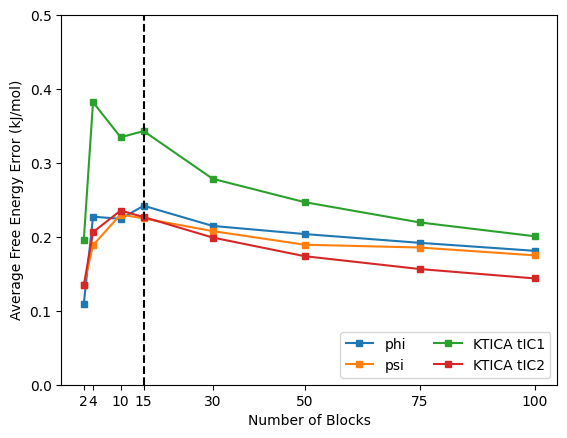

In [3]:
# 2. Block Analysis
block_label_name = ['phi','psi','KTICA tIC1','KTICA tIC2']
blocksize = np.array([2,4,10,15,30,50,75,100])
error_average = [0] * len(colvar_name)
for i,cv in enumerate(colvar_name):
    error_average[i] = np.loadtxt('log{cv}_0'.format(cv=cv))[:-5]
    plt.plot(blocksize,error_average[i],ms=5,marker='s',label=block_label_name[i])
plt.vlines(15,0.0,0.5,colors='black',linestyles='dashed')
plt.xlabel('Number of Blocks')
plt.xticks(blocksize)
plt.ylim(0,0.5)
plt.ylabel('Average Free Energy Error (kJ/mol)')
plt.legend(ncols=2,loc='lower right')
#plt.savefig('../../figures/Block_Analysis.png',dpi=600,bbox_inches='tight')
plt.show()

In [4]:
fes_ref_phi = plumed.read_as_pandas('hist-fes1/fes-phi.dat')
fes_ref_psi = plumed.read_as_pandas('hist-fes1/fes-psi.dat')

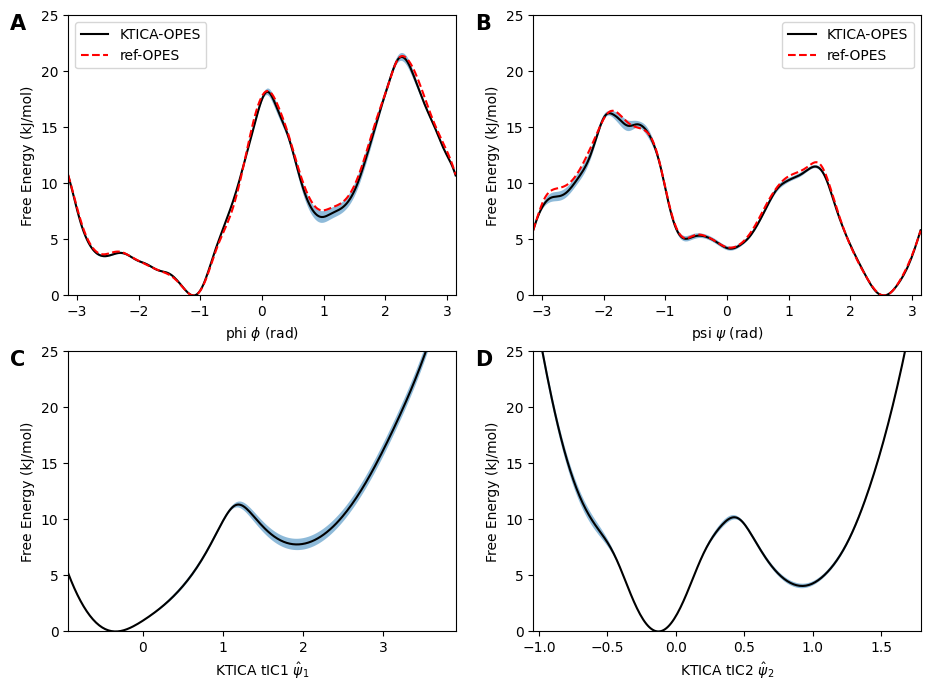

In [5]:
# 3. Final 1d free energy with error bars: we use the error bars from 250 blocks for tica cvs
#    and 1500 blocks for phi/psi
errorbar = [0] * len(colvar_name)
no_of_blocks = 15

fig,ax = plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(11,8))
index_x = -0.15
index_y = 0.95

cv = 'phi'
i = 0
errorbar[i] = np.loadtxt('block_{no_of_blocks}_err/err_fes_{cv}_{no_of_blocks}'.format(cv=cv,no_of_blocks=no_of_blocks))
x = fes_1d[cv][4][cv]
y = fes_1d[cv][4]['file.free']
ax[0,0].plot(x,y,'k-',ms=3,label='KTICA-OPES')
if cv == 'phi':
    ax[0,0].plot(fes_ref_phi['phi'],fes_ref_phi['file.free'],'r--',ms=3,label='ref-OPES')
if cv == 'psi':
    ax[0,0].plot(fes_ref_psi['psi'],fes_ref_psi['file.free'],'r--',ms=3,label='ref-OPES')
ax[0,0].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[0,0].set_xlim(fes_1d[cv][4][cv].min(),fes_1d[cv][4][cv].max())
ax[0,0].set_ylim(0,25)
ax[0,0].set_xlabel(xlabel_name[i])
ax[0,0].set_ylabel('Free Energy (kJ/mol)')
if cv == 'phi' or cv == 'psi':
    ax[0,0].legend()
    
cv = 'psi'
i = 1
errorbar[i] = np.loadtxt('block_{no_of_blocks}_err/err_fes_{cv}_{no_of_blocks}'.format(cv=cv,no_of_blocks=no_of_blocks))
x = fes_1d[cv][4][cv]
y = fes_1d[cv][4]['file.free']
ax[0,1].plot(x,y,'k-',ms=3,label='KTICA-OPES')
if cv == 'phi':
    ax[0,1].plot(fes_ref_phi['phi'],fes_ref_phi['file.free'],'r--',ms=3,label='ref-OPES')
if cv == 'psi':
    ax[0,1].plot(fes_ref_psi['psi'],fes_ref_psi['file.free'],'r--',ms=3,label='ref-OPES')
ax[0,1].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[0,1].set_xlim(fes_1d[cv][4][cv].min(),fes_1d[cv][4][cv].max())
ax[0,1].set_ylim(0,25)
ax[0,1].set_xlabel(xlabel_name[i])
ax[0,1].set_ylabel('Free Energy (kJ/mol)')
if cv == 'phi' or cv == 'psi':
    ax[0,1].legend()
    
cv = 'tica0'
i = 2
errorbar[i] = np.loadtxt('block_{no_of_blocks}_err/err_fes_{cv}_{no_of_blocks}'.format(cv=cv,no_of_blocks=no_of_blocks))
x = fes_1d[cv][4][cv]
y = fes_1d[cv][4]['file.free']
ax[1,0].plot(x,y,'k-',ms=3,label='KTICA-OPES')
if cv == 'phi':
    ax[1,0].plot(fes_ref_phi['phi'],fes_ref_phi['file.free'],'r--',ms=3,label='ref-OPES')
if cv == 'psi':
    ax[1,0].plot(fes_ref_psi['psi'],fes_ref_psi['file.free'],'r--',ms=3,label='ref-OPES')
ax[1,0].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[1,0].set_xlim(fes_1d[cv][4][cv].min(),fes_1d[cv][4][cv].max())
ax[1,0].set_ylim(0,25)
ax[1,0].set_xlabel(xlabel_name[i])
ax[1,0].set_ylabel('Free Energy (kJ/mol)')
if cv == 'phi' or cv == 'psi':
    ax[1,0].legend()
    
cv = 'tica1'
i = 3
errorbar[i] = np.loadtxt('block_{no_of_blocks}_err/err_fes_{cv}_{no_of_blocks}'.format(cv=cv,no_of_blocks=no_of_blocks))
x = fes_1d[cv][4][cv]
y = fes_1d[cv][4]['file.free']
ax[1,1].plot(x,y,'k-',ms=3,label='KTICA-OPES')
if cv == 'phi':
    ax[1,1].plot(fes_ref_phi['phi'],fes_ref_phi['file.free'],'r--',ms=3,label='ref-OPES')
if cv == 'psi':
    ax[1,1].plot(fes_ref_psi['psi'],fes_ref_psi['file.free'],'r--',ms=3,label='ref-OPES')
ax[1,1].fill_between(x,y-errorbar[i],y+errorbar[i],alpha=0.5)
ax[1,1].set_xlim(fes_1d[cv][4][cv].min(),fes_1d[cv][4][cv].max())
ax[1,1].set_ylim(0,25)
ax[1,1].set_xlabel(xlabel_name[i])
ax[1,1].set_ylabel('Free Energy (kJ/mol)')
if cv == 'phi' or cv == 'psi':
    ax[1,1].legend()

ax[0,0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0,0].transAxes, size=15, weight='bold')
ax[0,1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[0,1].transAxes, size=15, weight='bold')
ax[1,0].text(index_x, index_y, string.ascii_uppercase[2],transform=ax[1,0].transAxes, size=15, weight='bold')
ax[1,1].text(index_x, index_y, string.ascii_uppercase[3],transform=ax[1,1].transAxes, size=15, weight='bold')
#plt.tight_layout()
plt.savefig('../../figures/FES_final_with_errorbars_all.png',dpi=600,bbox_inches='tight')
plt.show()

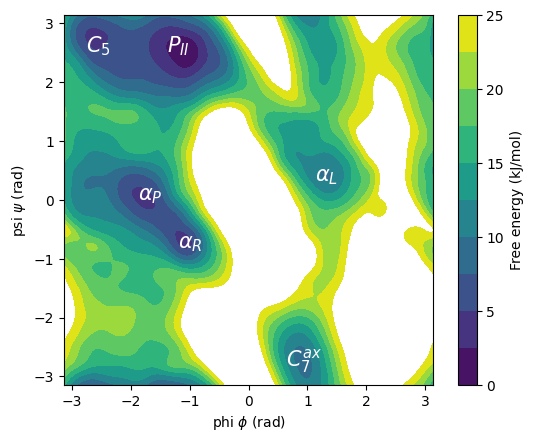

In [6]:
# Figure 3: ref and annotation
index_x = -0.1
index_y = 1
vmax = 25

levels = np.linspace(0,vmax,11)

fig,ax = plt.subplots()
xlabel_name = ['phi $\phi$ (rad)','psi $\psi$ (rad)','kTICA tIC1 $\psi_1$','kTICA IC2 $\psi_2$']

cv1 = 'phi'
cv2 = 'psi'

fes_2d = plumed.read_as_pandas('hist-fes1/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax.contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax, label='Free energy (kJ/mol)')
ax.set_aspect('equal')
ax.set_xlabel(xlabel_name[0])
ax.set_ylabel(xlabel_name[1])
ax.text(0.06, 0.9, '$C_5$',transform=ax.transAxes, size=15, color='white')
ax.text(0.28, 0.9, '$P_{II}$',transform=ax.transAxes, size=15, color='white')
ax.text(0.2, 0.5, r'${\alpha}_{P}$',transform=ax.transAxes, size=15, color='white')
ax.text(0.31, 0.37, r'${\alpha}_{R}$',transform=ax.transAxes, size=15, color='white')
ax.text(0.68, 0.55, r'${\alpha}_{L}$',transform=ax.transAxes, size=15, color='white')
ax.text(0.6, 0.05, '$C_7^{ax}$',transform=ax.transAxes, size=15, color='white')
#plt.tight_layout()
plt.savefig('../../figures/FES_2d_ref.png',dpi=600,bbox_inches='tight')

plt.show()


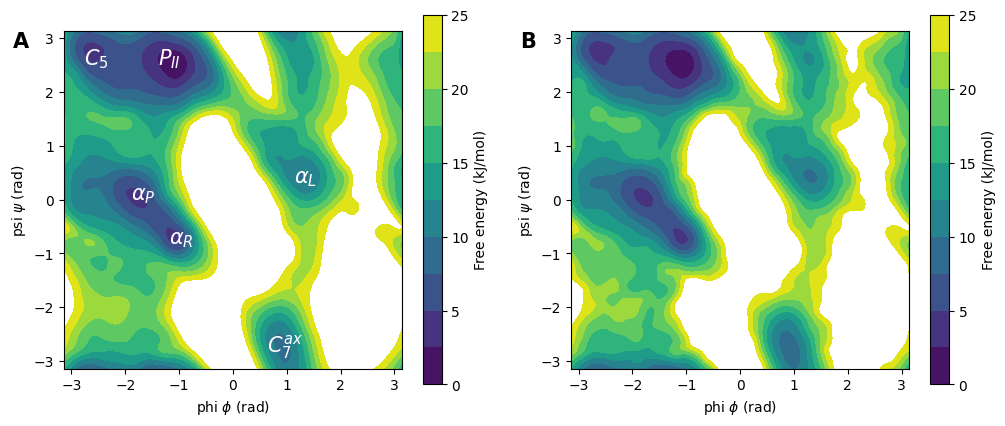

In [7]:
# 2D FES: phi and psi --- both ref and ktica opes
index_x = -0.15
index_y = 0.95
vmax = 25

levels = np.linspace(0,vmax,11)

fig,ax = plt.subplots(nrows=1,ncols=2,sharex=False,sharey=False,figsize=(12,4.8))
xlabel_name = ['phi $\phi$ (rad)','psi $\psi$ (rad)','KTICA tIC1 $\hat \psi_1$','KTICA tIC2 $\hat \psi_2$']

cv1 = 'phi'
cv2 = 'psi'

fes_2d = plumed.read_as_pandas('hist-fes1/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax[0].contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax[0], label='Free energy (kJ/mol)')
ax[0].set_aspect('equal')
ax[0].set_xlabel(xlabel_name[0])
ax[0].set_ylabel(xlabel_name[1])

fes_2d = plumed.read_as_pandas('hist-fes0/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax[1].contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax[1], label='Free energy (kJ/mol)')
ax[1].set_aspect('equal')
ax[1].set_xlabel(xlabel_name[0])
ax[1].set_ylabel(xlabel_name[1])

ax[0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0].transAxes, size=15, weight='bold')
ax[1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[1].transAxes, size=15, weight='bold')

ax[0].text(0.06, 0.9, '$C_5$',transform=ax[0].transAxes, size=15, color='white')
ax[0].text(0.28, 0.9, '$P_{II}$',transform=ax[0].transAxes, size=15, color='white')
ax[0].text(0.2, 0.5, r'${\alpha}_{P}$',transform=ax[0].transAxes, size=15, color='white')
ax[0].text(0.31, 0.37, r'${\alpha}_{R}$',transform=ax[0].transAxes, size=15, color='white')
ax[0].text(0.68, 0.55, r'${\alpha}_{L}$',transform=ax[0].transAxes, size=15, color='white')
ax[0].text(0.6, 0.05, '$C_7^{ax}$',transform=ax[0].transAxes, size=15, color='white')

#plt.tight_layout()
plt.savefig('../../figures/FES_2d_tica_vs_ref.png',dpi=600,bbox_inches='tight')
plt.show()

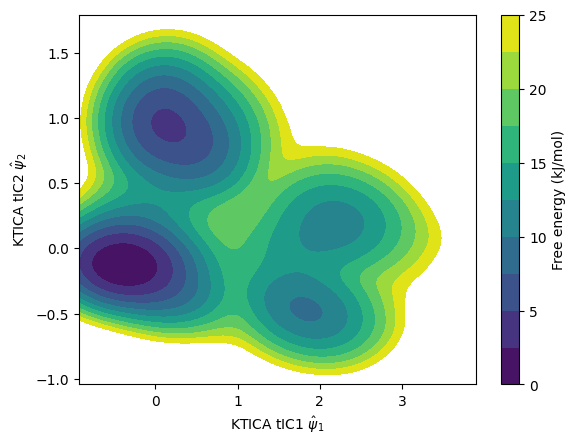

In [8]:
index_x = -0.15
index_y = 0.95
vmax = 25

levels = np.linspace(0,vmax,11)

fig,ax = plt.subplots()

cv1 = 'tica0'
cv2 = 'tica1'

fes_2d = plumed.read_as_pandas('hist-fes0/fes2d-{cv1}-{cv2}.dat'.format(cv1=cv1,cv2=cv2))
nbins = int(np.sqrt(len(fes_2d.iloc[:,2])))
x = np.linspace(fes_2d[cv1].min(), fes_2d[cv1].max(), nbins)
y = np.linspace(fes_2d[cv2].min(), fes_2d[cv2].max(), nbins)
X, Y = np.meshgrid(x, y)
Z = fes_2d.iloc[:,2].to_numpy().reshape(nbins,nbins).T
contourf = ax.contourf(X, Y, Z,vmax=vmax,color='black',levels=levels)
cb = fig.colorbar(contourf, ax=ax, label='Free energy (kJ/mol)')
ax.set_aspect('auto')
ax.set_xlabel(xlabel_name[2])
ax.set_ylabel(xlabel_name[3])

#ax.text(index_x, index_y, string.ascii_uppercase[2],transform=ax.transAxes, size=15, weight='bold')

plt.savefig('../../figures/FES_2d_tica.png',dpi=600,bbox_inches='tight')
plt.show()

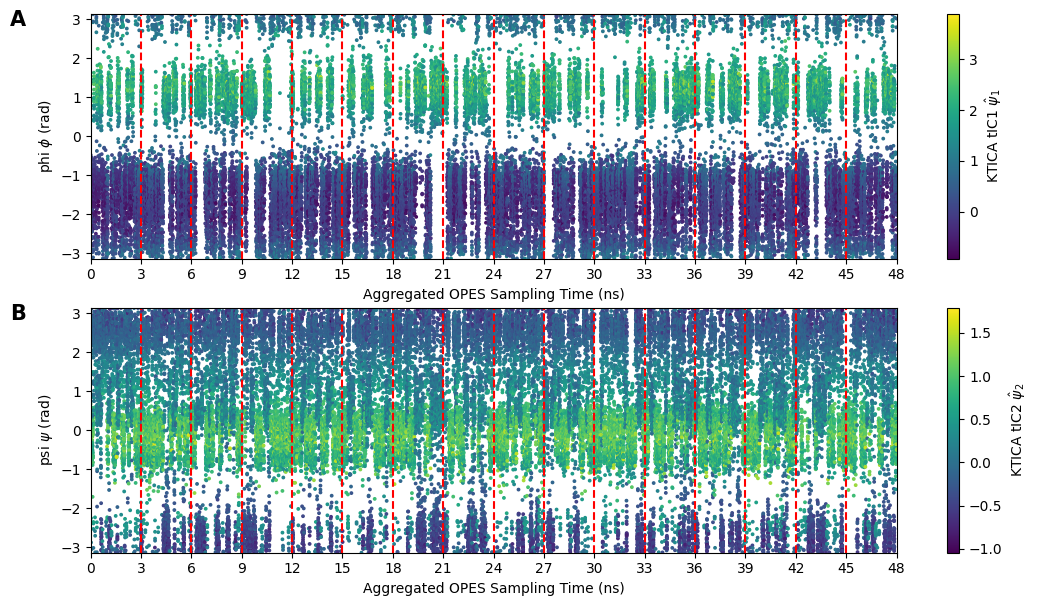

In [9]:
index_x = -0.1
index_y = 0.95
# OPES replica 0-7 timeseries
stride = 1
markersize = 3

colvar_all = []
no_walkers = 16
for i in range(no_walkers):
    colvar_i = plumed.read_as_pandas('raw/COLVAR.{i}'.format(i=i))
    colvar_i['time'] = (colvar_i['time'] + i * 3001)/1000
    colvar_all.append(colvar_i)
colvar = pd.concat(colvar_all)

xticks = np.linspace(0,48,17)
    
fig,ax = plt.subplots(2,1,figsize=(13,7))

sc1 = ax[0].scatter(colvar['time'][::stride],colvar['phi'][::stride],s=markersize,c=colvar['tica0'][::stride])
sc2 = ax[1].scatter(colvar['time'][::stride],colvar['psi'][::stride],s=markersize,c=colvar['tica1'][::stride])
cb1 = fig.colorbar(sc1, ax=ax[0], label=r'KTICA tIC1 $\hat \psi_1$')
cb1 = fig.colorbar(sc2, ax=ax[1], label=r'KTICA tIC2 $\hat \psi_2$')

ax[0].vlines(xticks[1:-1],-3.142,3.142,color='red',linestyle='dashed')
ax[1].vlines(xticks[1:-1],-3.142,3.142,color='red',linestyle='dashed')

ax[0].set_ylabel('phi $\phi$ (rad)')
ax[1].set_ylabel('psi $\psi$ (rad)')

ax[0].text(index_x, index_y, string.ascii_uppercase[0],transform=ax[0].transAxes, size=15, weight='bold')
ax[1].text(index_x, index_y, string.ascii_uppercase[1],transform=ax[1].transAxes, size=15, weight='bold')

plt.setp(ax,xticks=xticks,xlim=(0,48),xlabel='Aggregated OPES Sampling Time (ns)',ylim=(-3.142,3.142))
plt.savefig('../../figures/opes_timeseries.png',dpi=600,bbox_inches='tight')
plt.show()